In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-37.445720595373636 -32.90004727806334
4.649447052895624 -152.74296595102817
49.79383813408222 -179.82573842685537
68.89189299826054 -86.3324955063551
70.376028449584 -128.36278209422807
-60.325651616989084 39.62613553315242
42.82044316653122 129.90392082882573
-72.5594077640771 110.38547725605571
-2.6491793186314965 -36.795369831715135
-20.878208955070036 -106.0694289427127
-63.81794210494864 -1.90664865064889
-31.837458279850708 52.43422260263219
33.44462242191504 -42.94466843194735
61.02783703890444 7.461878127281921
36.81910335984864 -178.3511165906262
76.42845460277786 55.06510619060231
84.59899268381986 -49.670216133927454
-84.2077013446336 156.61278291958786
36.622159971611765 157.47038755124987
62.31118362939435 -165.07689584651644
11.24340985980912 68.53468093024745
-19.841141343205422 -139.12509332756952
-37.393751569891805 -74.6648489042019
25.05496428223968 23.641107534499497
78.82458918772969 -108.44742113453299
26.034001660407682 -70.58479496516856
17.889563652460495 157.

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

arraial do cabo br
hilo us
provideniya ru
attawapiskat ca
tuktoyaktuk ca
port alfred za
tumen cn
albany au
aquiraz br
puerto ayora ec
cape town za
taolanaro mg
ribeira grande pt
laerdalsoyri no
kapaa us
belushya guba ru
upernavik gl
bluff nz
sentyabrskiy ru
nome us
kavaratti in
rikitea pf
lebu cl
jalu ly
yellowknife ca
cockburn town bs
butaritari ki
sayyan ye
tommot ru
vaitupu wf
atuona pf
new norfolk au
ushuaia ar
jorochito bo
longyearbyen sj
matagami ca
busselton au
ossora ru
la ronge ca
albany au
ponta do sol cv
saint-francois gp
kaitangata nz
ushuaia ar
rikitea pf
rikitea pf
albany au
ilulissat gl
kiama au
punta arenas cl
swellendam za
ugoofaaru mv
sao joao da barra br
ancud cl
ilhabela br
taolanaro mg
bredasdorp za
albany au
ushuaia ar
kaitangata nz
severo-kurilsk ru
padang id
mar del plata ar
bababe mr
rikitea pf
tuktoyaktuk ca
cockburn town bs
mrirt ma
clyde river ca
rodrigues alves br
sabha ly
jamestown sh
saint marys us
turukhansk ru
nikolskoye ru
port alfred za
araouane ml
ch

atuona pf
sentyabrskiy ru
shuangcheng cn
ilulissat gl
altay cn
albany au
ushuaia ar
damietta eg
qui nhon vn
pevek ru
clyde river ca
vardo no
alappuzha in
mataura pf
port-gentil ga
hofn is
hermanus za
rikitea pf
dikson ru
varhaug no
khatanga ru
hobyo so
amderma ru
abu samrah qa
antofagasta cl
jamestown sh
umzimvubu za
nikolskoye ru
saint-philippe re
avarua ck
tigil ru
arraial do cabo br
norman wells ca
svetlaya ru
okhtyrka ua
saskylakh ru
caravelas br
esfarayen ir
hithadhoo mv
hobart au
fisciano it
albany au
chokurdakh ru
kaitangata nz
amderma ru
ushuaia ar
fiumicino it
kaeo nz
mount gambier au
busselton au
bluff nz
north myrtle beach us
boralday kz
langenburg ca
whitianga nz
punta arenas cl
walvis bay na
haines junction ca
swinoujscie pl
neiafu to
hilo us
fukue jp
nuevitas cu
tsovazard am
upernavik gl
albany au
mahebourg mu
kodiak us
busselton au
halalo wf
soyo ao
cidreira br
punta arenas cl
vestbygda no
ushuaia ar
saint-pierre pm
saint george bm
hobart au
avarua ck
rikitea pf
punta ar

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | provideniya
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | tumen
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | aquiraz
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | laerdalsoyri
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 20 of Set 1 | nome
Processing Record 21 of Set 1 | kavaratti
Processin

Processing Record 37 of Set 4 | manta
Processing Record 38 of Set 4 | zhangjiakou
Processing Record 39 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 40 of Set 4 | marzuq
Processing Record 41 of Set 4 | tyumentsevo
Processing Record 42 of Set 4 | dunedin
Processing Record 43 of Set 4 | faanui
Processing Record 44 of Set 4 | lagoa
Processing Record 45 of Set 4 | manggar
Processing Record 46 of Set 4 | cardinal
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | palakkad
Processing Record 49 of Set 4 | beisfjord
Processing Record 50 of Set 4 | verkhnevilyuysk
Processing Record 1 of Set 5 | pandan
Processing Record 2 of Set 5 | kerrobert
Processing Record 3 of Set 5 | forestville
Processing Record 4 of Set 5 | yerbogachen
Processing Record 5 of Set 5 | yaan
Processing Record 6 of Set 5 | fortuna
Processing Record 7 of Set 5 | mount pleasant
Processing Record 8 of Set 5 | buqayq
City not found. Skipping...
Processing Record 9 of Set 5 | urdoma
Processi

Processing Record 26 of Set 8 | chokurdakh
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | surt
Processing Record 29 of Set 8 | nuuk
Processing Record 30 of Set 8 | beringovskiy
Processing Record 31 of Set 8 | manali
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | palmer
Processing Record 34 of Set 8 | coaldale
Processing Record 35 of Set 8 | harper
Processing Record 36 of Set 8 | oktyabrskoye
Processing Record 37 of Set 8 | ostrovnoy
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | veraval
Processing Record 40 of Set 8 | muroto
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | englewood
Processing Record 43 of Set 8 | cururupu
Processing Record 44 of Set 8 | desert hot springs
Processing Record 45 of Set 8 | bull savanna
Processing Record 46 of Set 8 | kudahuvadhoo
Processing Record 47 of Set 8 | baykit
Processing Record 48 of Set 8 | tabas
Processing Record 49 of S

Processing Record 15 of Set 12 | amahai
Processing Record 16 of Set 12 | alugan
Processing Record 17 of Set 12 | umm jarr
City not found. Skipping...
Processing Record 18 of Set 12 | north branch
Processing Record 19 of Set 12 | grootfontein
Processing Record 20 of Set 12 | lolua
City not found. Skipping...
Processing Record 21 of Set 12 | mahajanga
Processing Record 22 of Set 12 | kroya
Processing Record 23 of Set 12 | maceio
Processing Record 24 of Set 12 | sri aman
Processing Record 25 of Set 12 | guadalupe y calvo
Processing Record 26 of Set 12 | grants
Processing Record 27 of Set 12 | sisimiut
Processing Record 28 of Set 12 | bontang
Processing Record 29 of Set 12 | ust-kuyga
Processing Record 30 of Set 12 | celestun
Processing Record 31 of Set 12 | warrington
Processing Record 32 of Set 12 | fort nelson
Processing Record 33 of Set 12 | jaguarao
Processing Record 34 of Set 12 | ahipara
Processing Record 35 of Set 12 | dali
Processing Record 36 of Set 12 | gamba
Processing Record 3

In [21]:
# Confrim over 500 cities were retrieved
len(city_data)

542

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df
# Reorder Columns of the DataFrame
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns=new_column_order)
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arraial Do Cabo,BR,2022-07-31 14:38:22,-22.9661,-42.0278,71.56,53,0,5.75
1,Hilo,US,2022-07-31 14:40:09,19.7297,-155.0900,74.93,90,75,8.05
2,Provideniya,RU,2022-07-31 14:40:10,64.3833,-173.3000,46.49,85,8,3.65
3,Tuktoyaktuk,CA,2022-07-31 14:40:11,69.4541,-133.0374,48.20,81,40,11.50
4,Port Alfred,ZA,2022-07-31 14:40:11,-33.5906,26.8910,59.18,69,29,5.99
...,...,...,...,...,...,...,...,...,...
537,Beloha,MG,2022-07-31 14:55:09,-25.1667,45.0500,71.26,69,27,8.10
538,Sakakah,SA,2022-07-31 14:50:30,29.9697,40.2064,112.57,6,31,12.44
539,Reidsville,US,2022-07-31 14:55:10,36.3549,-79.6645,82.92,73,75,0.00
540,Flinders,AU,2022-07-31 14:55:10,-34.5833,150.8552,57.38,70,100,8.99


In [24]:
# Create the ouput file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

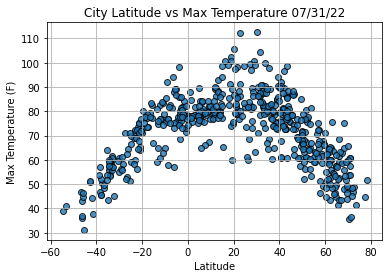

In [28]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other properties.
plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

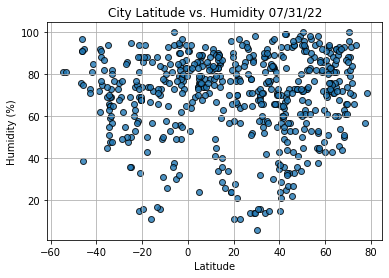

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

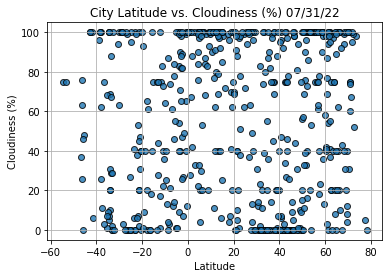

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

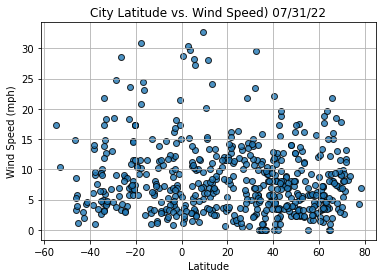

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed) " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()